# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather_data = city_weather_response.json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_data["coord"]["lat"]
        city_lng = city_weather_data["coord"]["lon"]
        city_max_temp = city_weather_data["main"]["temp"]
        city_humidity = city_weather_data["main"]["humidity"]
        city_clouds = city_weather_data["clouds"]["all"]
        city_wind =  city_weather_data["wind"]["speed"]
        city_country = city_weather_data["sys"]["country"]
        city_date = city_weather_data['dt'] #Time of data calculation, unix, UTC

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pangai
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | thunder bay
Processing Record 5 of Set 1 | rancharia
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | kurumkan
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | belmonte
Processing Record 13 of Set 1 | motygino
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | jayapura
Processing Record 18 of Set 1 | grass valley
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | chaman
Processing Record 21 of Set 1 | st. john's
Processing Record 22 of Set 1 | ust-nera
Processing Record 23 of Set

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangai,-19.8000,-174.3500,296.55,77,82,8.63,TO,1694929092
1,bilibino,68.0546,166.4372,278.79,62,99,0.99,RU,1694929093
2,yellowknife,62.4560,-114.3525,283.87,95,20,2.06,CA,1694929093
3,thunder bay,48.4001,-89.3168,282.10,93,40,2.06,CA,1694929093
4,rancharia,-22.2292,-50.8931,294.67,45,0,2.78,BR,1694929094


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangai,-19.8000,-174.3500,296.55,77,82,8.63,TO,1694929092
1,bilibino,68.0546,166.4372,278.79,62,99,0.99,RU,1694929093
2,yellowknife,62.4560,-114.3525,283.87,95,20,2.06,CA,1694929093
3,thunder bay,48.4001,-89.3168,282.10,93,40,2.06,CA,1694929093
4,rancharia,-22.2292,-50.8931,294.67,45,0,2.78,BR,1694929094


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

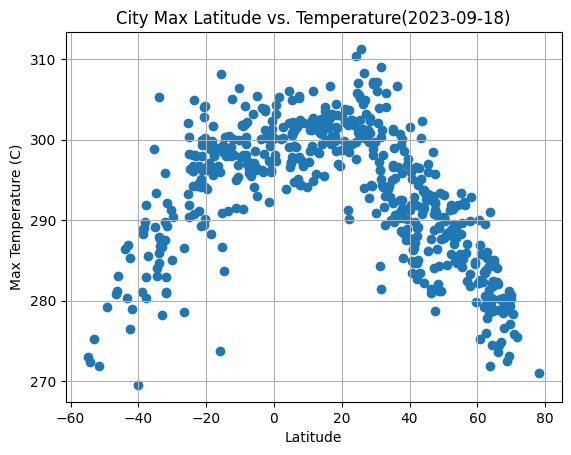

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
plt.title("City Max Latitude vs. Temperature(2023-09-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

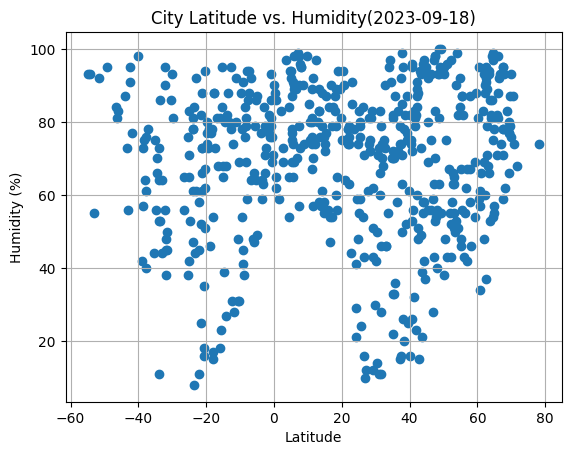

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])
plt.title("City Latitude vs. Humidity(2023-09-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

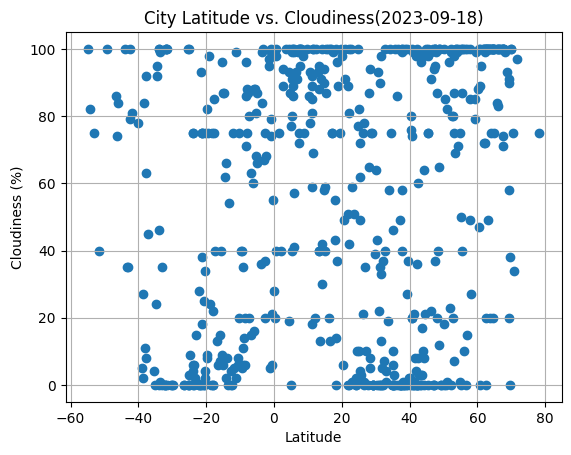

In [24]:
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness(2023-09-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

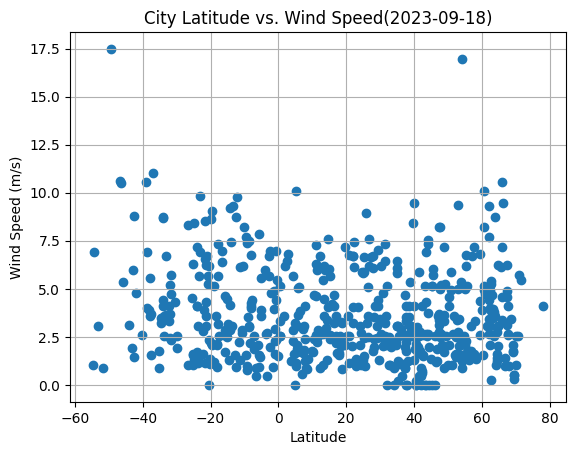

In [25]:
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed(2023-09-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def show_lin_reg(x,y,x_label,y_label,x_text_pos,y_text_pos):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    print(f"The r-value is: {r_value}")
    plt.scatter(x,y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    regression_line = [slope * i + intercept for i in x]
    plt.plot(x, regression_line, c='red', linewidth=2)
    plt.text(x_text_pos,y_text_pos,f"y = {slope:.3f}x + {intercept:.3f} ",color='red')
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,278.79,62,99,0.99,RU,1694929093
2,yellowknife,62.4560,-114.3525,283.87,95,20,2.06,CA,1694929093
3,thunder bay,48.4001,-89.3168,282.10,93,40,2.06,CA,1694929093
6,kurumkan,54.3000,110.3000,291.89,51,71,0.87,RU,1694929094
8,anadyr,64.7500,177.4833,278.71,75,20,2.00,RU,1694929095


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangai,-19.8000,-174.3500,296.55,77,82,8.63,TO,1694929092
4,rancharia,-22.2292,-50.8931,294.67,45,0,2.78,BR,1694929094
5,waitangi,-43.9535,-176.5597,286.38,87,100,3.13,NZ,1694929094
7,avarua,-21.2078,-159.7750,296.18,88,75,3.09,CK,1694929095
9,port-aux-francais,-49.3500,70.2167,279.18,95,100,17.48,TF,1694929095


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8213010852941856


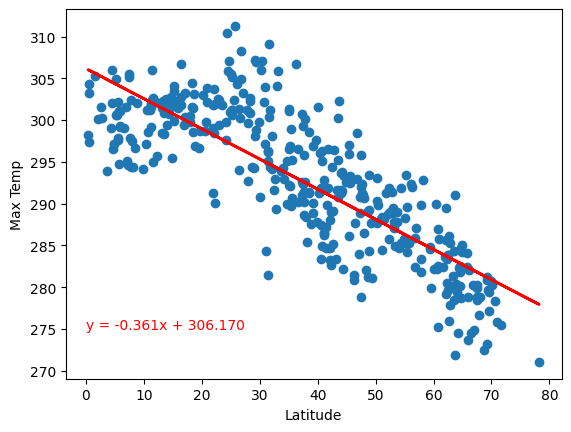

In [48]:
# Linear regression on Northern Hemisphere
show_lin_reg(northern_hemi_df["Lat"],
             northern_hemi_df["Max Temp"],
             "Latitude",
             "Max Temp",
             0,
             275)


The r-value is: 0.733690193894816


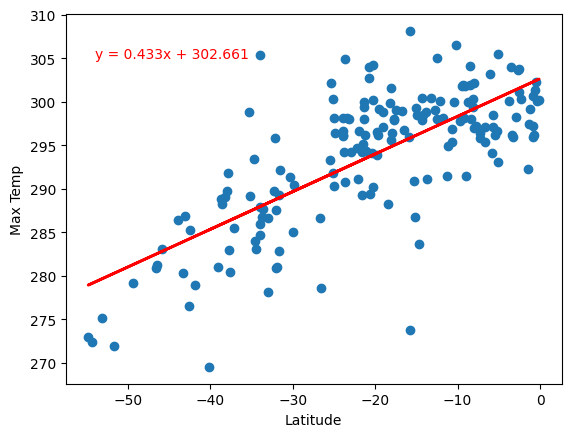

In [56]:
# Linear regression on Southern Hemisphere
show_lin_reg(southern_hemi_df["Lat"],
             southern_hemi_df["Max Temp"],
             "Latitude",
             "Max Temp",
             -54,
             305)

**Discussion about the linear relationship:** 

In the Northern hemisphere whenever the altitude increases the temparature get's decreased, while in southern hemisphere, when altitude increases the temparature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.019105650632774578


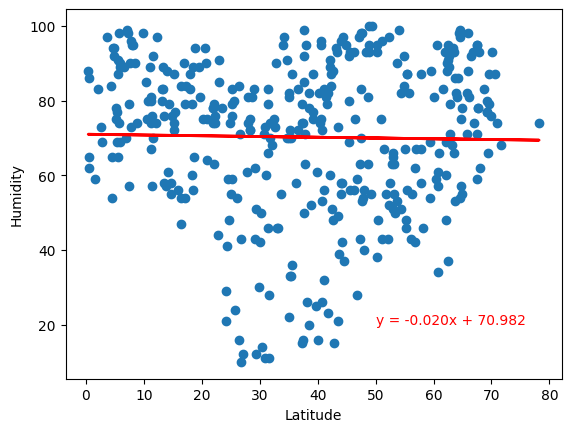

In [58]:
# Northern Hemisphere
show_lin_reg(northern_hemi_df["Lat"],
             northern_hemi_df["Humidity"],
             "Latitude",
             "Humidity",
             50,
             20)

The r-value is: 0.009070367946215015


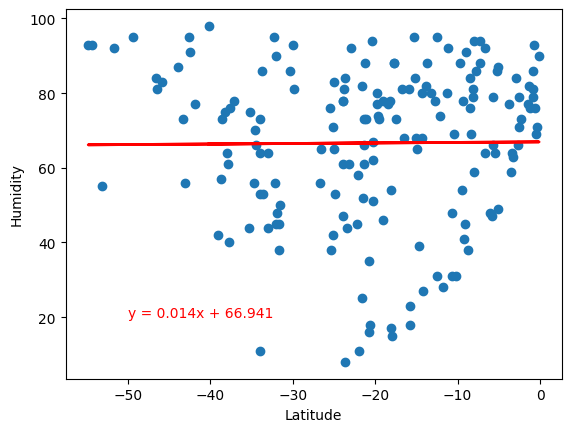

In [60]:
# Southern Hemisphere
show_lin_reg(southern_hemi_df["Lat"],
             southern_hemi_df["Humidity"],
             "Latitude",
             "Humidity",
             -50,
             20)

**Discussion about the linear relationship:** as we can see that the regression line is parrallel to x-axis, it typically indicates that there is no significant relationship between independent_variable(latitude) and dependent variable(humidity) 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04816779614963969


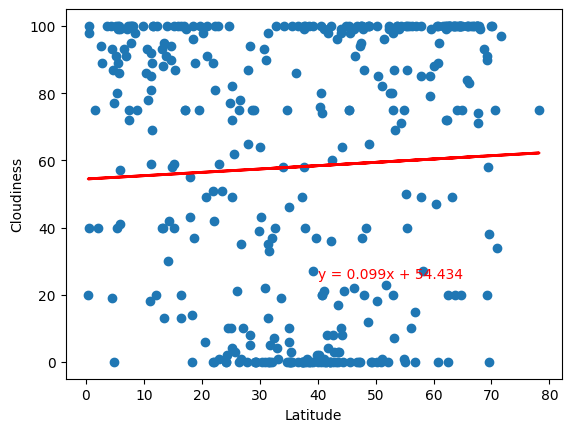

In [62]:
# Northern Hemisphere
show_lin_reg(northern_hemi_df["Lat"],
             northern_hemi_df["Cloudiness"],
             "Latitude",
             "Cloudiness",
             40,
             25)

The r-value is: -0.019234486754968465


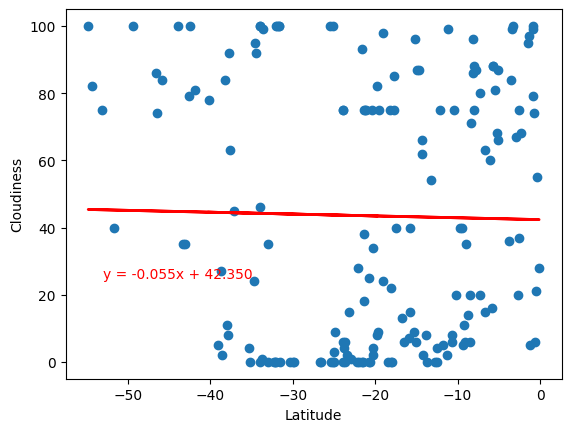

In [63]:
# Southern Hemisphere
show_lin_reg(southern_hemi_df["Lat"],
             southern_hemi_df["Cloudiness"],
             "Latitude",
             "Cloudiness",
             -53,
             25)

**Discussion about the linear relationship:** In this relationship also we cannot say that there is any relationship between latitude and cloudiness in both northern and southern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.055129384222820224


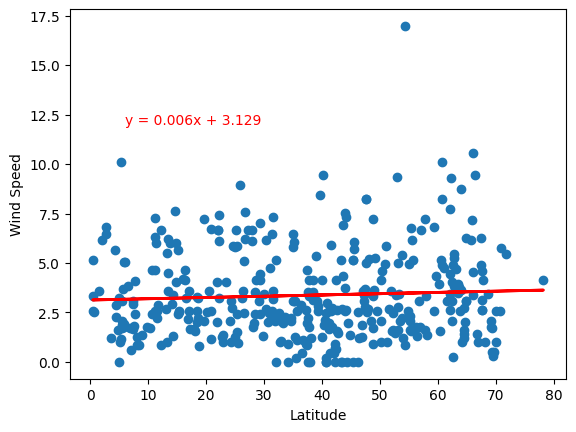

In [64]:
# Northern Hemisphere
show_lin_reg(northern_hemi_df["Lat"],
             northern_hemi_df["Wind Speed"],
             "Latitude",
             "Wind Speed",
             6,
             12)

The r-value is: -0.1722827452835224


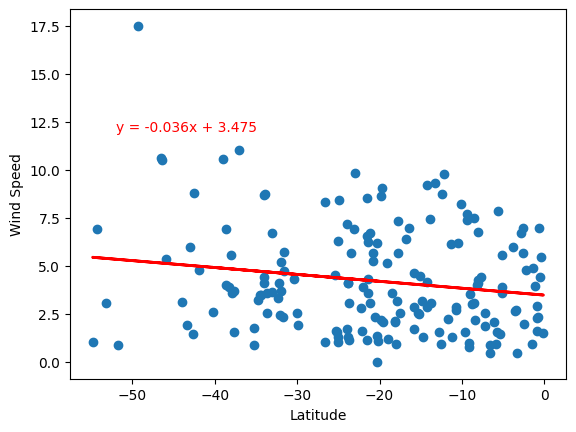

In [65]:
# Southern Hemisphere
show_lin_reg(southern_hemi_df["Lat"],
             southern_hemi_df["Wind Speed"],
             "Latitude",
             "Wind Speed",
             -52,
             12)

**Discussion about the linear relationship:** There is a slight relationship between latitude and windspeed in southern hemisphere, means whenever the altitude increases, there is an impact in wind speed